In [38]:
#call cleaned dataset and use modules
import pandas as pd
import scipy.stats as sp
import random
import numpy as np 
import matplotlib.pyplot as plt

dt= pd.read_csv("../Resources/Cleaned_Cvd.csv")
dt.head()


,Unnamed: 0,General Health,Checkup,Exercise,Heart Disease,Skin Cancer,Other Cancer,Depression,Diabetes,Arthritis,Sex,Age Category,Height (cm),Weight (kg),BMI,Smoking History,Alcohol (Servings/Month),Fruit (Servings/Month),Green Vegetables (Servings/Month),Fried Potato (Servings/Month)
0,0,Poor,<2,No,No,No,No,No,None,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,1,Very Good,<1,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,2,Very Good,<1,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,3,Poor,<1,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,4,Good,<1,No,No,No,No,No,None,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [39]:
#split by Heart disease


dt['Heart Disease'].value_counts()
healthgroup = dt.groupby(['Heart Disease'])
healthgroup.mean()




C:\Users\slbow\AppData\Local\Temp\ipykernel_18152\3630047516.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  healthgroup.mean()


,Unnamed: 0,Height (cm),Weight (kg),BMI,Alcohol (Servings/Month),Fruit (Servings/Month),Green Vegetables (Servings/Month),Fried Potato (Servings/Month)
Heart Disease,,,,,,,,
No,154309.023725,170.565367,83.298262,28.543676,5.185298,29.983159,15.216878,6.320104
Yes,155762.029915,171.182332,86.889986,29.564505,4.085339,28.153138,13.900404,6.029594


Text(0, 0.5, 'Average Fried Potato Servings Consumed per Month')

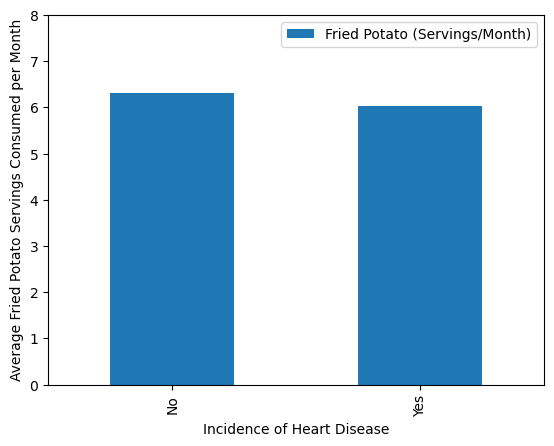

In [40]:
#Bar graph for Potato consumption
potatohealth = healthgroup[[ "Fried Potato (Servings/Month)"]]
meanp = potatohealth.mean()
taterplot = meanp.plot(kind = 'bar', ylim=(0,8) )
taterplot.set_xlabel('Incidence of Heart Disease')
taterplot.set_ylabel('Average Fried Potato Servings Consumed per Month')

Text(0, 0.5, 'Average Green Vegetable Servings Consumed per Month')

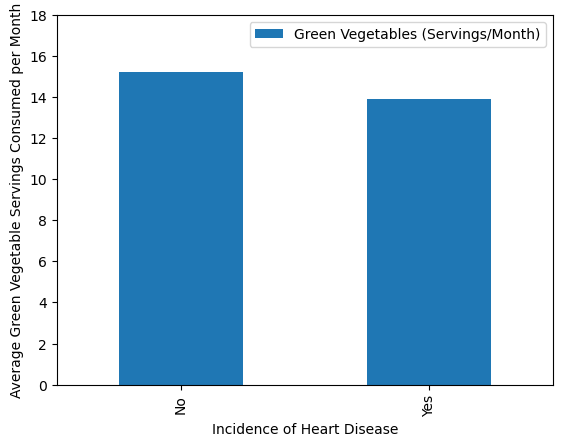

In [41]:
#Veggie Plot
veghealth = healthgroup[[ "Green Vegetables (Servings/Month)"]]
meang = veghealth.mean()
vegplot = meang.plot(kind = 'bar', ylim=(0,18) )
vegplot.set_xlabel('Incidence of Heart Disease')
vegplot.set_ylabel('Average Green Vegetable Servings Consumed per Month')

Text(0, 0.5, 'Average Fruit Servings Consumed per Month')

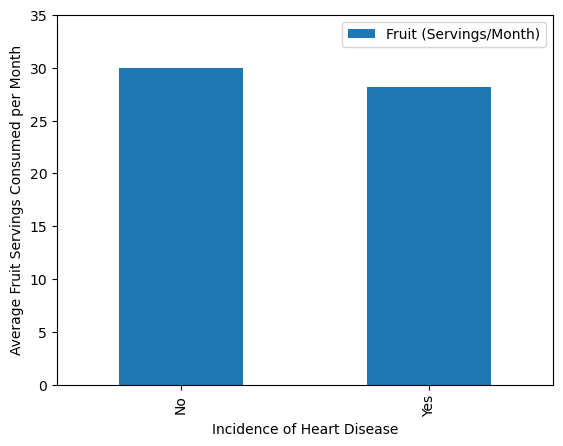

In [42]:
fruit = healthgroup[[ "Fruit (Servings/Month)"]]
meanf = fruit.mean()
frtplot = meanf.plot(kind = 'bar', ylim=(0,35) )
frtplot.set_xlabel('Incidence of Heart Disease')
frtplot.set_ylabel('Average Fruit Servings Consumed per Month')

Text(0, 0.5, 'Average Alcohol Servings Consumed per Month')

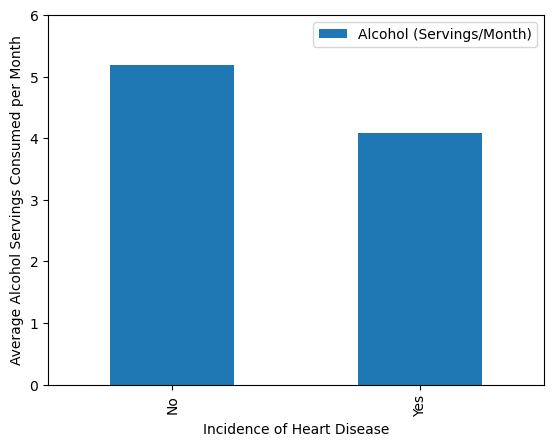

In [43]:
alchealth = healthgroup[[ "Alcohol (Servings/Month)"]]
meana = alchealth.mean()
alcplot = meana.plot(kind = 'bar', ylim=(0,6) )
alcplot.set_xlabel('Incidence of Heart Disease')
alcplot.set_ylabel('Average Alcohol Servings Consumed per Month')

<Axes: xlabel='Heart Disease'>

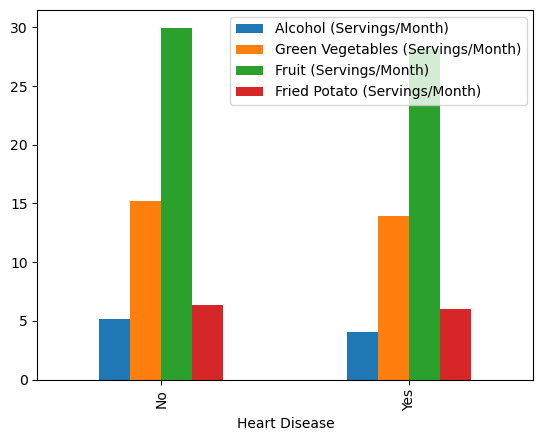

In [44]:
#Altogether
allhealth = healthgroup[['Alcohol (Servings/Month)', 'Green Vegetables (Servings/Month)', 
                         'Fruit (Servings/Month)', 'Fried Potato (Servings/Month)']]
meant = allhealth.mean()
totplot = meant.plot(kind='bar')
totplot

In [45]:
#population tests Potato
has_cvd_pot = dt[dt['Heart Disease']=='Yes']['Fried Potato (Servings/Month)']
no_cvd_pot = dt[dt['Heart Disease']=='No']['Fried Potato (Servings/Month)']
sp.ttest_ind(has_cvd_pot,no_cvd_pot, equal_var=False)


Ttest_indResult(statistic=-5.169651270128542, pvalue=2.3605295647977296e-07)

In [46]:
#Population test vegetables
has_cvd_veg = dt[dt['Heart Disease']=='Yes']['Green Vegetables (Servings/Month)']
no_cvd_veg = dt[dt['Heart Disease']=='No']['Green Vegetables (Servings/Month)']
sp.ttest_ind(has_cvd_veg,no_cvd_veg, equal_var=False)

Ttest_indResult(statistic=-14.196454879078571, pvalue=1.3501822352236017e-45)

In [47]:
#Fruits
has_cvd_frt = dt[dt['Heart Disease']=='Yes']['Fruit (Servings/Month)']
no_cvd_frt = dt[dt['Heart Disease']=='No']['Fruit (Servings/Month)']
sp.ttest_ind(has_cvd_frt,no_cvd_frt, equal_var=False)

Ttest_indResult(statistic=-11.326455555886188, pvalue=1.1165920567363132e-29)

In [48]:
#alcohol
has_cvd_alc = dt[dt['Heart Disease']=='Yes']['Alcohol (Servings/Month)']
no_cvd_alc = dt[dt['Heart Disease']=='No']['Alcohol (Servings/Month)']
sp.ttest_ind(has_cvd_alc,no_cvd_alc, equal_var=False)

Ttest_indResult(statistic=-20.450951787434544, pvalue=2.5640209275570343e-92)

<Axes: title={'center': 'Fried Potato (Servings/Month)'}, xlabel='Heart Disease'>

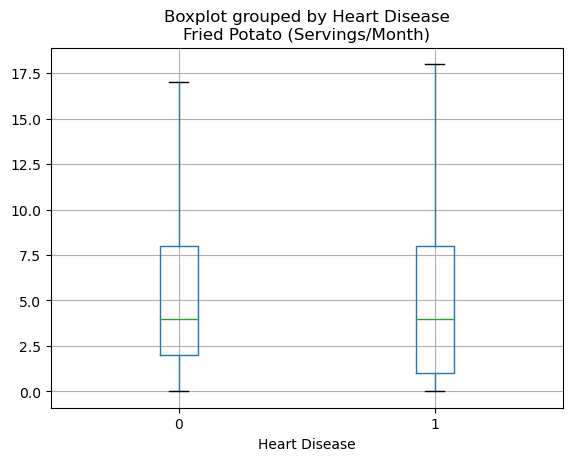

In [56]:
#boxplots

dt.boxplot('Fried Potato (Servings/Month)', by = "Heart Disease",showfliers = False)

<Axes: title={'center': 'Green Vegetables (Servings/Month)'}, xlabel='Heart Disease'>

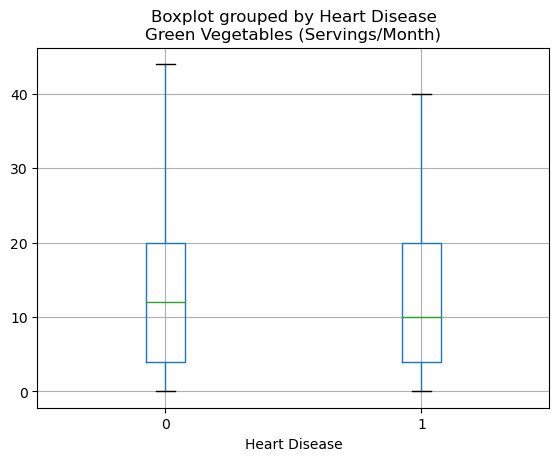

In [57]:
dt.boxplot('Green Vegetables (Servings/Month)', by = "Heart Disease",showfliers = False)

<Axes: title={'center': 'Fruit (Servings/Month)'}, xlabel='Heart Disease'>

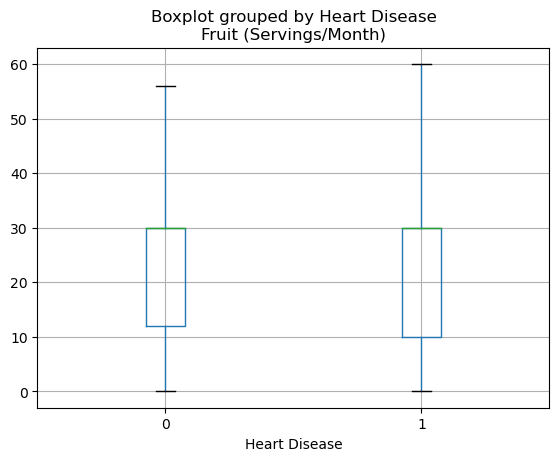

In [58]:
dt.boxplot('Fruit (Servings/Month)', by = "Heart Disease",showfliers = False)

<Axes: title={'center': 'Alcohol (Servings/Month)'}, xlabel='Heart Disease'>

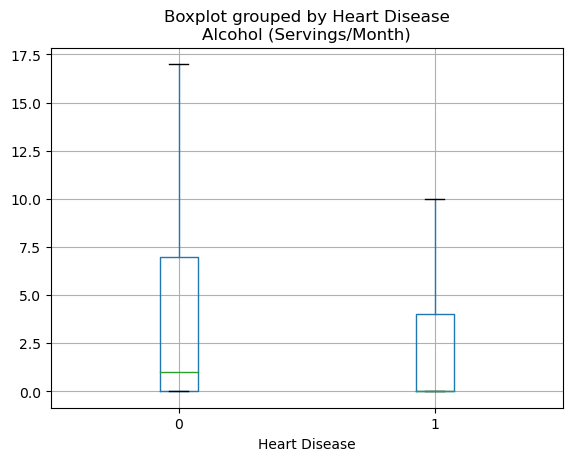

In [59]:
dt.boxplot('Alcohol (Servings/Month)', by = "Heart Disease",showfliers = False)

In [49]:
#Regression Analysis-Ordinal Data
dt['Heart Disease']=dt['Heart Disease'].replace({'Yes': 1,
                                                 'No': 0})
dt.head()

,Unnamed: 0,General Health,Checkup,Exercise,Heart Disease,Skin Cancer,Other Cancer,Depression,Diabetes,Arthritis,Sex,Age Category,Height (cm),Weight (kg),BMI,Smoking History,Alcohol (Servings/Month),Fruit (Servings/Month),Green Vegetables (Servings/Month),Fried Potato (Servings/Month)
0,0,Poor,<2,No,0,No,No,No,None,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,1,Very Good,<1,No,1,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,2,Very Good,<1,Yes,0,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,3,Poor,<1,Yes,1,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,4,Good,<1,No,0,No,No,No,None,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [50]:
pot_slope, pot_int, pot_r, pot_p, pot_se = sp.linregress(dt['Heart Disease'], dt['Fried Potato (Servings/Month)'])
veg_slope, veg_int, veg_r, veg_p, veg_se = sp.linregress(dt['Heart Disease'], dt['Green Vegetables (Servings/Month)'])
frt_slope, frt_int, frt_r, frt_p, frt_se = sp.linregress(dt['Heart Disease'], dt['Fruit (Servings/Month)'])
alc_slope, alc_int, alc_r, alc_p, alc_se = sp.linregress(dt['Heart Disease'], dt['Alcohol (Servings/Month)'])

The r-squared is 8.513673297493686e-05


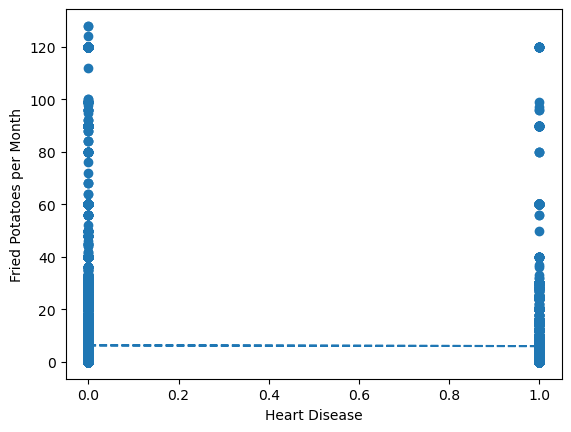

In [51]:
pot_fit = pot_slope*dt['Heart Disease']+pot_int

plt.scatter(dt['Heart Disease'], dt['Fried Potato (Servings/Month)'])
plt.plot(dt['Heart Disease'], pot_fit, '--')
plt.xlabel('Heart Disease')
plt.ylabel('Fried Potatoes per Month')
print(f'The r-squared is {pot_r**2}')
plt.show()

The r-squared is 0.0005780878386886422


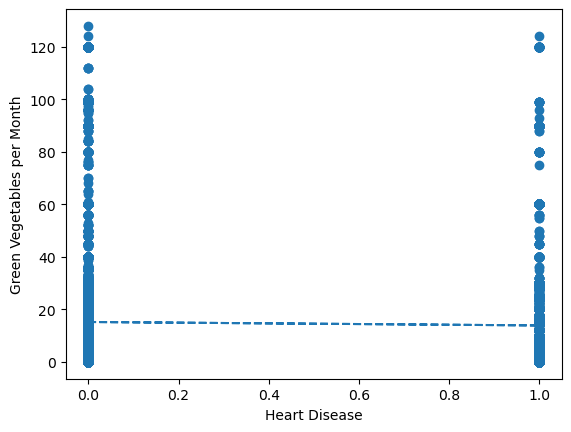

In [52]:
veg_fit = veg_slope*dt['Heart Disease']+veg_int

plt.scatter(dt['Heart Disease'], dt['Green Vegetables (Servings/Month)'])
plt.plot(dt['Heart Disease'], veg_fit, '--')
plt.xlabel('Heart Disease')
plt.ylabel('Green Vegetables per Month')

print(f'The r-squared is {veg_r**2}')
plt.show()

The r-squared is 0.00040218930433081094


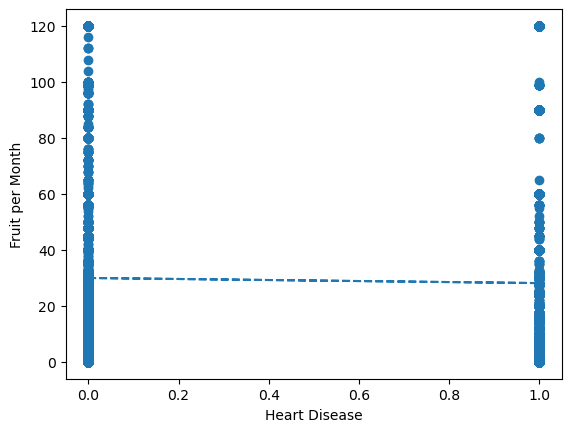

In [53]:
frt_fit = frt_slope*dt['Heart Disease']+frt_int

plt.scatter(dt['Heart Disease'], dt['Fruit (Servings/Month)'])
plt.plot(dt['Heart Disease'], frt_fit, '--')
plt.xlabel('Heart Disease')
plt.ylabel('Fruit per Month')
print(f'The r-squared is {frt_r**2}')
plt.show()


The r-squared is 0.0013372753843698775


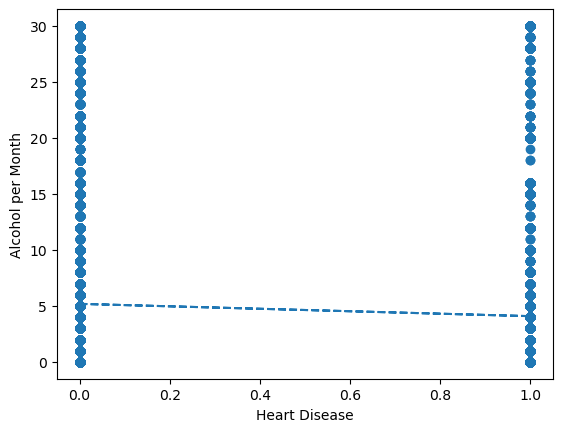

In [54]:
alc_fit = alc_slope*dt['Heart Disease']+alc_int

plt.scatter(dt['Heart Disease'], dt['Alcohol (Servings/Month)'])
plt.plot(dt['Heart Disease'], alc_fit, '--')
plt.xlabel('Heart Disease')
plt.ylabel('Alcohol per Month')
print(f'The r-squared is {alc_r**2}')
plt.show()


In [55]:
print(pot_slope)
print(veg_slope)
print(frt_slope)
print(alc_slope)

-0.2905093752731126
-1.3164736108698518
-1.8300209150947062
-1.0999591753795732


### Analysis

-----

This dataset studies the links between different food items and the risks of heart disease. from what we can find, there are statistically significant results, but the correlation between the two is very weak. It seems that people that have heart disease eat a little under two fewer servings of fruit per month, as well as 1.3 servings fewer of vegetables. But again these correlation coefficients are near zero, so take those individual relationships with a grain of salt. There are some other interesting data, though. For example, the median serving count of alcohol drank per month among those with heart disease is zero, while the median for fruit consumption among heart disease patients and those without is also the same. The only median increase in consumption is for fried potatoes. 